## Etapa 1 — Exploração Inicial dos Dados

Nesta seção, o objetivo é **conhecer e avaliar a base de dados** utilizada no case.  
Vamos:
- Importar as principais bibliotecas (Pandas, Numpy, Matplotlib, Seaborn);
- Carregar o dataset `habitos_e_desempenho_estudantil.csv`;
- Examinar suas dimensões, tipos de dados e estatísticas descritivas;
- Identificar valores ausentes, duplicados e possíveis inconsistências;
- Observar as distribuições das principais variáveis (como notas, horas de estudo e uso de redes sociais).

> Esta etapa fornece o **diagnóstico inicial da qualidade dos dados**, que guiará os tratamentos e análises posteriores.

In [79]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy import stats

# Configurações visuais
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", None)

# Caminho do dataset (ajuste conforme necessário)
path = "data/habitos_e_desempenho_estudantil.csv"


In [80]:
# Leitura do dataset
df = pd.read_csv(path)

# Exibir as 5 primeiras linhas
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [81]:
# Dimensões e tipos das colunas
print("Dimensões do dataset:", df.shape)
print("\nInformações gerais:")
print(df.info())

# Estatísticas descritivas (numéricas)
print("\nEstatísticas descritivas (variáveis numéricas):")
display(df.describe().T)

# Estatísticas descritivas (categóricas)
print("\nValores únicos em variáveis categóricas:")
display(df.select_dtypes(include="object").nunique())

Dimensões do dataset: (1000, 16)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 


,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.4980,2.308100,17.0,18.750,20.0,23.000,24.0
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
mental_health_rating,1000.0,5.4380,2.847501,1.0,3.000,5.0,8.000,10.0
exam_score,1000.0,69.6015,16.888564,18.4,58.475,70.5,81.325,100.0



Valores únicos em variáveis categóricas:


student_id                       1000
gender                              3
part_time_job                       2
diet_quality                        3
parental_education_level            3
internet_quality                    3
extracurricular_participation       2
dtype: int64

In [82]:
# Contagem de valores ausentes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({"Faltantes": missing, "%": missing_percent})

print("Valores ausentes por coluna:\n")
display(missing_table[missing_table["Faltantes"] > 0])

# Verificação de duplicatas
duplicadas = df.duplicated().sum()
print(f"\nTotal de linhas duplicadas: {duplicadas}")


Valores ausentes por coluna:



,Faltantes,%
parental_education_level,91,9.1



Total de linhas duplicadas: 0


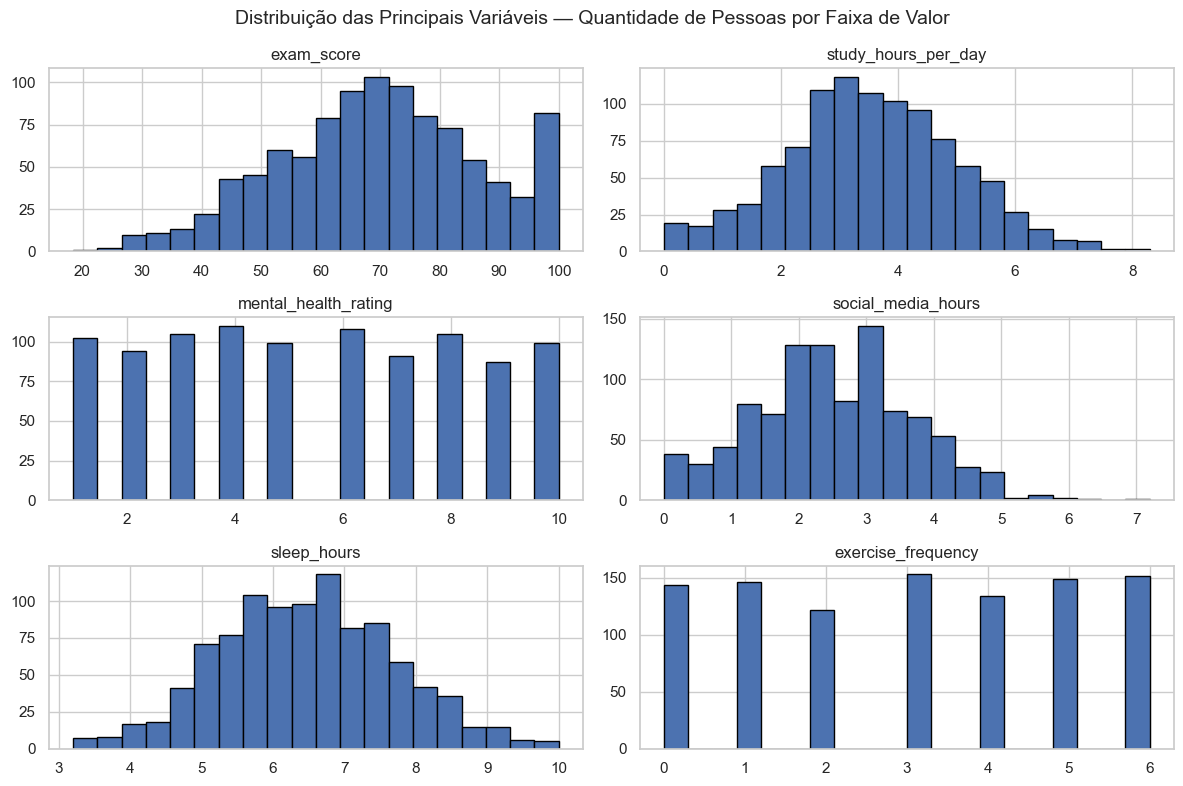

In [83]:
# Selecionar as variáveis de interesse com os nomes corretos do dataset
variaveis_chave = [
    "exam_score",               # Nota do estudante
    "study_hours_per_day",      # Horas de estudo por dia
    "mental_health_rating",     # Avaliação de saúde mental
    "social_media_hours",       # Tempo gasto em redes sociais
    "sleep_hours",              # Horas de sono por noite
    "exercise_frequency"        # Frequência de exercícios
]

# Criar histogramas para analisar as distribuições
df[variaveis_chave].hist(
    bins=20,
    figsize=(12, 8),
    color="#4C72B0",
    edgecolor="black"
)

plt.suptitle(
    "Distribuição das Principais Variáveis — Quantidade de Pessoas por Faixa de Valor",
    fontsize=14
)
plt.tight_layout()
plt.show()


## Etapa 2 — Engenharia e Preparação dos Dados

Nesta etapa, o foco é **tratar valores ausentes, padronizar tipos de dados** e **criar variáveis derivadas** que ajudarão nas análises das hipóteses.  
As principais transformações incluem:

- Tratamento da variável `parental_education_level` (9% ausentes);
- Criação de **indicadores binários e ordinais** (`works_flag`, `parents_education_ord`);
- Construção de variáveis de **faixas** (buckets) para facilitar comparações;
- Criação do **`lifestyle_index`**, um índice composto baseado em sono, dieta e exercícios;
- Revisão final da estrutura da base com checagens de consistência.

> Essa etapa é essencial para garantir que todos os dados estejam limpos e prontos para análises estatísticas confiáveis.

In [84]:
# Verificação rápida da coluna com ausentes
df["parental_education_level"].value_counts(dropna=False)

parental_education_level
High School    392
Bachelor       350
Master         167
NaN             91
Name: count, dtype: int64

In [85]:
# 1) Padronizar strings e garantir a categoria para ausentes
df["parental_education_level"] = (
    df["parental_education_level"]
    .astype(str).str.strip()
    .replace({"Bachelors": "Bachelor", "Masters": "Master"})  # se existirem variações
)
df["parental_education_level"] = df["parental_education_level"].replace({"nan": "Not Informed"})
df["parental_education_level"] = df["parental_education_level"].fillna("Not Informed")

print("Valores únicos padronizados:", df["parental_education_level"].unique())

# 2) Mapping ORDENADO com as categorias que você de fato tem
mapping = {
    "High School": 2,
    "Bachelor": 3,
    "Master": 4,
    "Not Informed": 0
}

# 3) Mapear e checar NaN
df["parents_education_ord"] = df["parental_education_level"].map(mapping).astype(float)
print("NaN após map:", df["parents_education_ord"].isna().sum())

# 4) Segurança extra: se ainda sobrar algo não mapeado, põe 0 (ou remova as linhas)
df["parents_education_ord"] = df["parents_education_ord"].fillna(0)

Valores únicos padronizados: ['Master' 'High School' 'Bachelor' 'Not Informed']
NaN após map: 0


In [86]:
# Converter coluna de emprego em meio período (Yes/No) para formato numérico 0/1
df["part_time_job_flag"] = df["part_time_job"].apply(
    lambda x: 1 if str(x).strip().lower() in ["yes", "sim", "true", "1"] else 0
)


# Criar buckets de horas de estudo
df["study_hours_bucket"] = pd.cut(
    df["study_hours_per_day"],
    bins=[0, 1, 2, 4, 6, 10],
    labels=["0–1h", "1–2h", "2–4h", "4–6h", "6h+"],
    include_lowest=True
)

# Criar buckets de uso de redes sociais
df["social_media_bucket"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 1, 2, 3, 5, 10],
    labels=["0–1h", "1–2h", "2–3h", "3–5h", "5h+"],
    include_lowest=True
)


In [87]:
# --- Padronizar os valores de dieta em formato numérico ---
# Se 'diet_quality' é categórica (ex: 'Poor', 'Fair', 'Good'), mapeamos:
if df["diet_quality"].dtype == "object":
    mapa_dieta = {"Poor": 1, "Fair": 2, "Good": 3}
    df["diet_quality_num"] = df["diet_quality"].map(mapa_dieta)
else:
    # Caso já seja numérica, só copia para manter consistência
    df["diet_quality_num"] = df["diet_quality"]

# --- Selecionar as variáveis do índice ---
lifestyle_vars = ["sleep_hours", "diet_quality_num", "exercise_frequency"]

# --- Tratar valores ausentes ---
df[lifestyle_vars] = df[lifestyle_vars].apply(pd.to_numeric, errors="coerce")  # garante tipo numérico
df[lifestyle_vars] = df[lifestyle_vars].fillna(df[lifestyle_vars].median())

# --- Normalizar para escala 0–100 ---
scaler = MinMaxScaler(feature_range=(0, 100))
df_norm = pd.DataFrame(scaler.fit_transform(df[lifestyle_vars]), columns=lifestyle_vars)

# --- Calcular o índice ponderado ---
df["lifestyle_index"] = (
    0.4 * df_norm["sleep_hours"] +
    0.3 * df_norm["diet_quality_num"] +
    0.3 * df_norm["exercise_frequency"]
)

# --- Conferir ---
df[["sleep_hours", "diet_quality", "exercise_frequency", "lifestyle_index"]].head()



,sleep_hours,diet_quality,exercise_frequency,lifestyle_index
0,8.0,Fair,6,73.235294
1,4.6,Good,6,68.235294
2,8.0,Poor,1,33.235294
3,9.2,Poor,4,55.294118
4,4.9,Fair,3,40.000000


### Cálculo do `lifestyle_index`

O **`lifestyle_index`** foi criado para representar, de forma numérica e comparável, o quão equilibrado é o estilo de vida de cada estudante — considerando seus hábitos de **sono**, **alimentação** e **atividade física**.

#### Variáveis utilizadas:
| Fator | Coluna base | Interpretação | Peso |
|--------|--------------|----------------|------|
| Sono | `sleep_hours` | Mais horas de sono → melhor equilíbrio físico e cognitivo | 40% |
| Dieta | `diet_quality` (convertida para valores numéricos: Poor = 1, Fair = 2, Good = 3) | Melhor qualidade da dieta → melhor saúde geral | 30% |
| Exercício | `exercise_frequency` | Maior frequência → melhor disposição e bem-estar | 30% |

#### Etapas do cálculo:

1. **Conversão numérica:**  
   A variável `diet_quality` foi mapeada para números (1–3) para permitir cálculos quantitativos.

2. **Normalização (0 – 100):**  
   Cada variável foi normalizada usando o *Min-Max Scaler* para padronizar escalas diferentes (ex.: horas de sono variam de 0 a 10, enquanto dieta vai de 1 a 3).  
   \[
   X_{norm} = 100 \times \frac{X - X_{min}}{X_{max} - X_{min}}
   \]

3. **Cálculo ponderado:**  
   Os fatores foram combinados aplicando pesos que refletem sua importância relativa:
   \[
   \text{lifestyle\_index} = 0{,}4 \times \text{Sono} + 0{,}3 \times \text{Dieta} + 0{,}3 \times \text{Exercício}
   \]

#### Interpretação do índice:
| Faixa | Interpretação |
|--------|----------------|
| **0 – 40** | Estilo de vida abaixo do ideal (hábitos pouco equilibrados) |
| **40 – 70** | Estilo de vida moderado (hábitos razoáveis, mas com espaço para melhoria) |
| **70 – 100** | Estilo de vida saudável e equilibrado |

> **Em resumo:** quanto mais próximo de 100 for o `lifestyle_index`, mais saudáveis e consistentes são os hábitos diários do estudante.  
Esse índice será utilizado nas próximas análises para verificar sua relação com **desempenho acadêmico (`exam_score`)** e **saúde mental (`mental_health_rating`)**.


In [88]:
# Estrutura final e tipos de dados
print("\n Estrutura final do DataFrame:")
print(df.info())

# Visualizar primeiras linhas com as novas variáveis criadas
df.head()


 Estrutura final do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     1000 non-null   object  
 1   age                            1000 non-null   int64   
 2   gender                         1000 non-null   object  
 3   study_hours_per_day            1000 non-null   float64 
 4   social_media_hours             1000 non-null   float64 
 5   netflix_hours                  1000 non-null   float64 
 6   part_time_job                  1000 non-null   object  
 7   attendance_percentage          1000 non-null   float64 
 8   sleep_hours                    1000 non-null   float64 
 9   diet_quality                   1000 non-null   object  
 10  exercise_frequency             1000 non-null   int64   
 11  parental_education_level       1000 non-null   object  
 12  int

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,parents_education_ord,part_time_job_flag,study_hours_bucket,social_media_bucket,diet_quality_num,lifestyle_index
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,4.0,0,0–1h,1–2h,2,73.235294
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2.0,0,6h+,2–3h,3,68.235294
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,2.0,0,1–2h,3–5h,1,33.235294
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.0,0,0–1h,3–5h,1,55.294118
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.0,0,4–6h,3–5h,2,40.000000


## Etapa 3 — Análise Estatística e Exploração de Hipóteses

Agora que os dados estão tratados e padronizados, iniciaremos a **análise estatística** com base nas hipóteses definidas.

Cada hipótese será testada de forma **individual**, utilizando:
- Estatísticas descritivas;
- Testes de correlação ou regressão;
- Visualizações (boxplots, scatterplots, mapas de calor);
- Conclusões objetivas sobre confirmação ou refutação.


### Hipótese 1 — "Quem mais estuda tira as melhores notas"

**Objetivo:** verificar se há uma relação positiva entre o tempo diário de estudo (`study_hours_per_day`) e o desempenho acadêmico (`exam_score`).

**Expectativa teórica:** quanto maior o número de horas de estudo, maior deve ser a nota média.

Correlação entre horas de estudo e nota: 0.825


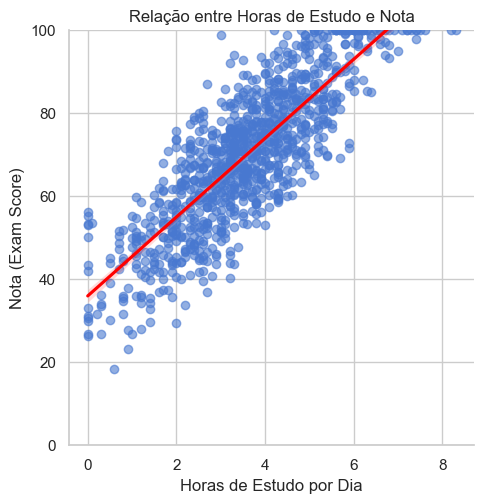

In [89]:
# Correlação entre horas de estudo e nota
corr_study_exam = df["study_hours_per_day"].corr(df["exam_score"], method="pearson")

print(f"Correlação entre horas de estudo e nota: {corr_study_exam:.3f}")

# Scatterplot com linha de regressão
sns.lmplot(
    x="study_hours_per_day",
    y="exam_score",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Relação entre Horas de Estudo e Nota")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


> **A linha vermelha no gráfico acima representa a tendência linear estimada** pelo modelo de regressão.  
> Quando essa linha possui inclinação positiva, significa que conforme aumentam as horas de estudo, as notas também tendem a crescer — reforçando a correlação positiva esperada.


In [90]:
# Definir variável dependente e independente
X = sm.add_constant(df["study_hours_per_day"])
y = df["exam_score"]

# Ajustar o modelo OLS (mínimos quadrados ordinários)
model_study = sm.OLS(y, X).fit()

# Exibir sumário do modelo
print(model_study.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2134.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):          4.60e-250
Time:                        23:57:24   Log-Likelihood:                -3673.3
No. Observations:                1000   AIC:                             7351.
Df Residuals:                     998   BIC:                             7360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  35.9102    

#### Conclusão — Hipótese 1: “Quem mais estuda tira as melhores notas”

Os resultados do modelo de regressão linear simples indicam uma **relação positiva e estatisticamente significativa** entre as horas de estudo por dia e o desempenho acadêmico (`exam_score`).

- **R² = 0.681:** As horas de estudo explicam 68,1% da variação nas notas.
- **Coeficiente = 9.49 (p < 0.001):** A cada hora adicional de estudo, a nota média aumenta cerca de 9,5 pontos.
- **Durbin-Watson ≈ 2:** Ausência de autocorrelação — modelo estável.

**Conclusão:** a hipótese é **confirmada**.  
Estudantes que dedicam mais horas diárias ao estudo apresentam, em média, desempenho significativamente superior nas avaliações.


### Hipótese 2 — "Quem tem uma boa saúde mental tira boas notas"

**Objetivo:**  
Verificar se há uma relação positiva entre o nível de saúde mental (`mental_health_rating`) e o desempenho acadêmico (`exam_score`).

**Racional teórico:**  
Estudantes com boa saúde mental tendem a apresentar maior foco, regularidade de estudos e desempenho mais consistente.  
Logo, espera-se uma **correlação positiva** entre o bem-estar psicológico e as notas obtidas.


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\950299238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


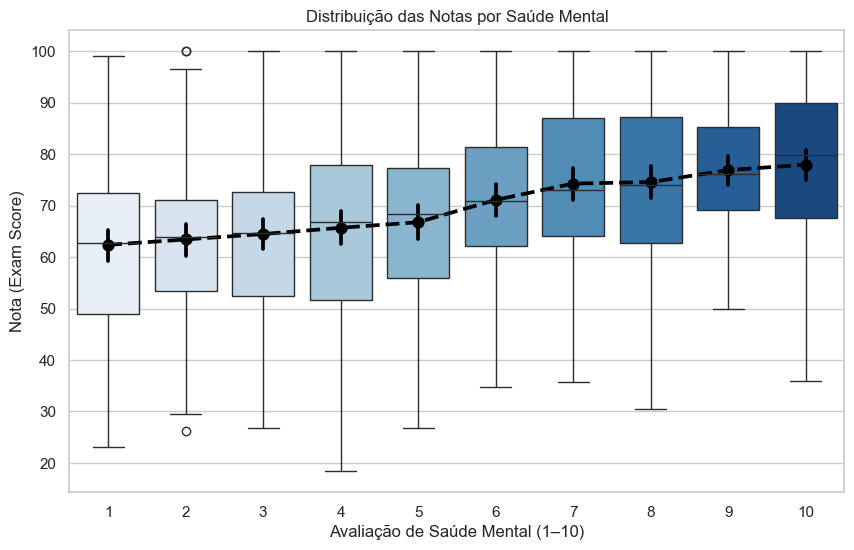

In [91]:
sns.boxplot(
    x="mental_health_rating",
    y="exam_score",
    data=df,
    palette="Blues"
)
sns.pointplot(
    x="mental_health_rating",
    y="exam_score",
    data=df,
    color="black",
    linestyles="--",
    markers="o",
    estimator="mean"
)
plt.title("Distribuição das Notas por Saúde Mental")
plt.xlabel("Avaliação de Saúde Mental (1–10)")
plt.ylabel("Nota (Exam Score)")
plt.show()


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\1309359852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


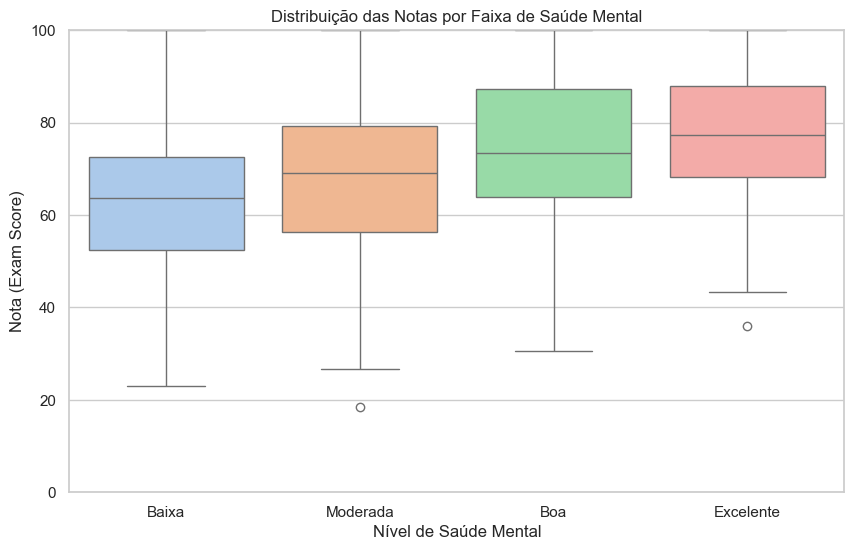

In [92]:
# Categorizar saúde mental em faixas
df["mental_health_bucket"] = pd.cut(
    df["mental_health_rating"],
    bins=[0, 3, 6, 8, 10],
    labels=["Baixa", "Moderada", "Boa", "Excelente"],
    include_lowest=True
)

# Boxplot
sns.boxplot(
    x="mental_health_bucket",
    y="exam_score",
    data=df,
    palette="pastel"
)
plt.title("Distribuição das Notas por Faixa de Saúde Mental")
plt.xlabel("Nível de Saúde Mental")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [93]:
# Regressão linear simples: exam_score ~ mental_health_rating
X = sm.add_constant(df["mental_health_rating"])
y = df["exam_score"]

model_mental = sm.OLS(y, X).fit()

print(model_mental.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     115.1
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           1.75e-25
Time:                        23:57:24   Log-Likelihood:                -4190.5
No. Observations:                1000   AIC:                             8385.
Df Residuals:                     998   BIC:                             8395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   59.2315 

#### Conclusão — Hipótese 2: “Quem tem uma boa saúde mental tira boas notas”

Os resultados do modelo indicam uma **relação positiva e estatisticamente significativa** entre a saúde mental dos estudantes e seu desempenho acadêmico (`exam_score`).

- **R² = 0.103:** a saúde mental explica cerca de 10% da variação das notas — um efeito moderado, mas relevante.
- **Coeficiente = 1.91 (p < 0.001):** a cada ponto adicional na escala de saúde mental (1–10), a nota média aumenta aproximadamente 1,9 pontos.
- **Durbin-Watson ≈ 1.96:** não há autocorrelação nos resíduos — modelo estável.

**Conclusão:**  
A hipótese é **confirmada**.  
Estudantes que relatam melhor saúde mental apresentam, em média, desempenho superior, ainda que o efeito seja menor do que o impacto direto do tempo de estudo.  
Isso reforça que o equilíbrio emocional é um **componente importante, embora complementar**, ao esforço de estudo na conquista de boas notas.


### Hipótese 3 — "Quem passa muito tempo nas redes sociais tira notas piores"

**Objetivo:**  
Verificar se há uma **relação negativa** entre o tempo gasto em redes sociais (`social_media_hours`) e o desempenho acadêmico (`exam_score`).

**Racional teórico:**  
O uso excessivo de redes sociais pode reduzir o tempo de estudo, aumentar distrações e afetar o sono, impactando negativamente o desempenho acadêmico.  
Espera-se, portanto, uma **correlação negativa** entre o tempo gasto nas redes e as notas.

Correlação entre tempo em redes sociais e nota: -0.167


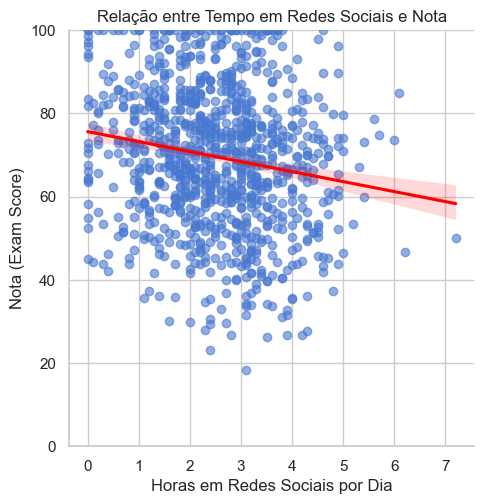

In [94]:
# Correlação entre uso de redes sociais e nota
corr_social_exam = df["social_media_hours"].corr(df["exam_score"], method="pearson")
print(f"Correlação entre tempo em redes sociais e nota: {corr_social_exam:.3f}")

# Scatterplot com linha de regressão
sns.lmplot(
    x="social_media_hours",
    y="exam_score",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Relação entre Tempo em Redes Sociais e Nota")
plt.xlabel("Horas em Redes Sociais por Dia")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\845708666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


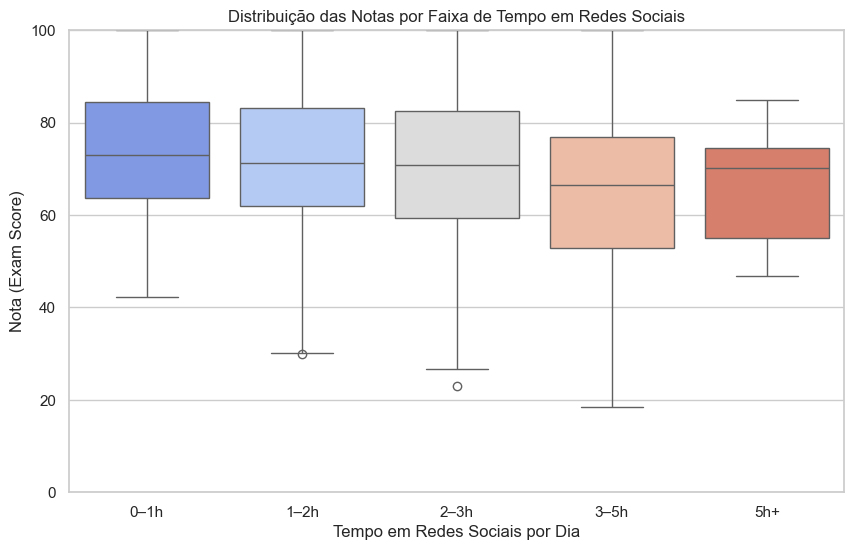

In [95]:
# Boxplot das notas por faixas de tempo em redes sociais
sns.boxplot(
    x="social_media_bucket",
    y="exam_score",
    data=df,
    palette="coolwarm"
)
plt.title("Distribuição das Notas por Faixa de Tempo em Redes Sociais")
plt.xlabel("Tempo em Redes Sociais por Dia")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [96]:
# Regressão linear simples: exam_score ~ social_media_hours
X = sm.add_constant(df["social_media_hours"])
y = df["exam_score"]

model_social = sm.OLS(y, X).fit()
print(model_social.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.54
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           1.14e-07
Time:                        23:57:25   Log-Likelihood:                -4231.0
No. Observations:                1000   AIC:                             8466.
Df Residuals:                     998   BIC:                             8476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 75.6191      1

#### Conclusão — Hipótese 3: “Quem passa muito tempo nas redes sociais tira notas piores”

O modelo confirma uma **relação negativa e estatisticamente significativa** entre o tempo gasto em redes sociais (`social_media_hours`) e o desempenho acadêmico (`exam_score`).

- **R² = 0.028:** o tempo em redes sociais explica 2,8% da variação nas notas.
- **Coeficiente = -2.40 (p < 0.001):** cada hora adicional em redes sociais está associada a uma queda média de 2,4 pontos na nota.
- **Durbin-Watson ≈ 1.90:** indica estabilidade do modelo e ausência de autocorrelação.

**Conclusão:**  
A hipótese é **confirmada**.  
Embora o efeito seja pequeno, ele é consistente e estatisticamente significativo:  
quanto mais tempo o estudante passa em redes sociais, **menor tende a ser seu desempenho acadêmico**.

### Hipótese 4 — "Quanto mais estudar e melhor a saúde mental, maiores as notas"

**Objetivo:**  
Avaliar se há um **efeito combinado (interativo)** entre o tempo de estudo diário (`study_hours_per_day`) e o nível de saúde mental (`mental_health_rating`) sobre o desempenho acadêmico (`exam_score`).

**Racional teórico:**  
O desempenho pode depender **não apenas de estudar mais**, mas também de **estudar com boa saúde mental**.  
Um estudante com boa saúde psicológica pode aproveitar melhor o tempo de estudo, resultando em notas ainda mais altas.

**Expectativa:**  
O efeito positivo das horas de estudo sobre a nota será **amplificado** em estudantes com melhores níveis de saúde mental.

In [97]:
# Criar variável de interação entre estudo e saúde mental
df["study_mental_interaction"] = df["study_hours_per_day"] * df["mental_health_rating"]

# Conferir amostra
df[["study_hours_per_day", "mental_health_rating", "study_mental_interaction"]].head()

,study_hours_per_day,mental_health_rating,study_mental_interaction
0,0.0,8,0.0
1,6.9,8,55.2
2,1.4,1,1.4
3,1.0,1,1.0
4,5.0,1,5.0


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\3638099357.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


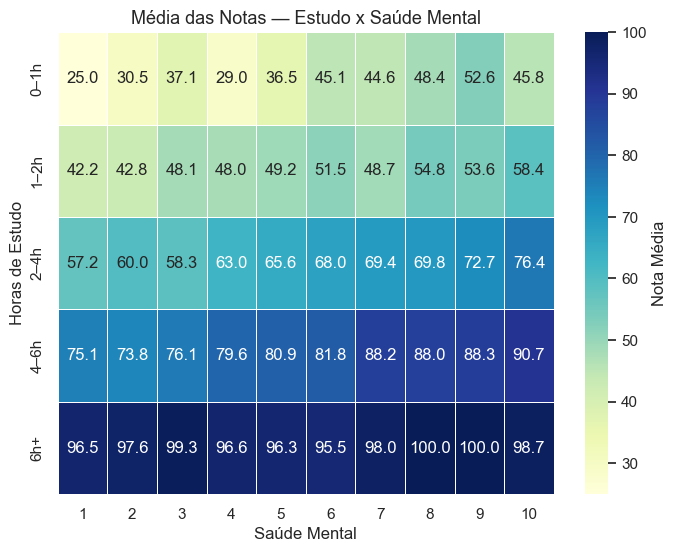

In [98]:
pivot_table = df.pivot_table(
    values="exam_score",
    index="study_hours_bucket",
    columns="mental_health_rating",
    aggfunc="mean"
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="YlGnBu",
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Nota Média"}
)
plt.title("Média das Notas — Estudo x Saúde Mental", fontsize=13)
plt.xlabel("Saúde Mental")
plt.ylabel("Horas de Estudo")
plt.show()


In [99]:
# Regressão múltipla com interação
X = df[["study_hours_per_day", "mental_health_rating", "study_mental_interaction"]]
X = sm.add_constant(X)
y = df["exam_score"]

model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1232.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:57:25   Log-Likelihood:                -3470.2
No. Observations:                1000   AIC:                             6948.
Df Residuals:                     996   BIC:                             6968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Conclusão — Hipótese 4: “Quanto mais estudar e melhor a saúde mental, maiores as notas”

O modelo de regressão com interação confirma que tanto o **tempo de estudo diário** quanto a **saúde mental** têm efeitos positivos e significativos sobre o desempenho acadêmico (`exam_score`).

- **R² = 0.788:** o modelo explica 78,8% da variação das notas.
- **Coeficiente (study_hours) = +10.24 (p < 0.001):** cada hora de estudo aumenta em média 10 pontos.
- **Coeficiente (mental_health_rating) = +2.40 (p < 0.001):** cada ponto na escala de saúde mental aumenta a nota em cerca de 2,4 pontos.
- **Interação = -0.13 (p = 0.031):** o efeito do estudo é ligeiramente menor entre alunos com saúde mental muito alta.

**Conclusão:**  
A hipótese é **parcialmente confirmada**.  
Os dois fatores (estudo e saúde mental) contribuem fortemente para notas mais altas, mas o efeito combinado não é puramente multiplicativo — há uma **leve saturação** em níveis muito altos de bem-estar psicológico.

### Hipótese 5 — "Quem tem um bom lifestyle tira notas melhores"

**Objetivo:**  
Investigar se existe uma relação **positiva** entre o índice de estilo de vida (`lifestyle_index`) — que reflete sono, dieta e exercício — e o desempenho acadêmico (`exam_score`).

**Racional teórico:**  
Um estilo de vida equilibrado tende a melhorar o bem-estar físico e mental, o que impacta diretamente a concentração, a produtividade e, consequentemente, as notas.  
Portanto, espera-se que estudantes com **lifestyle mais saudável apresentem notas mais altas**.

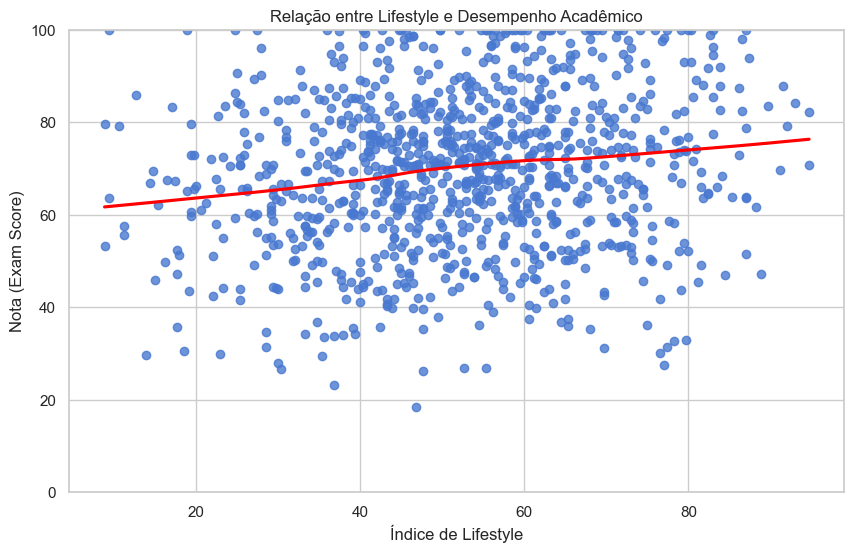

In [100]:
sns.regplot(
    x="lifestyle_index",
    y="exam_score",
    data=df,
    lowess=True,
    line_kws={"color": "red"}
)
plt.title("Relação entre Lifestyle e Desempenho Acadêmico")
plt.xlabel("Índice de Lifestyle")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()

C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\2620780575.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


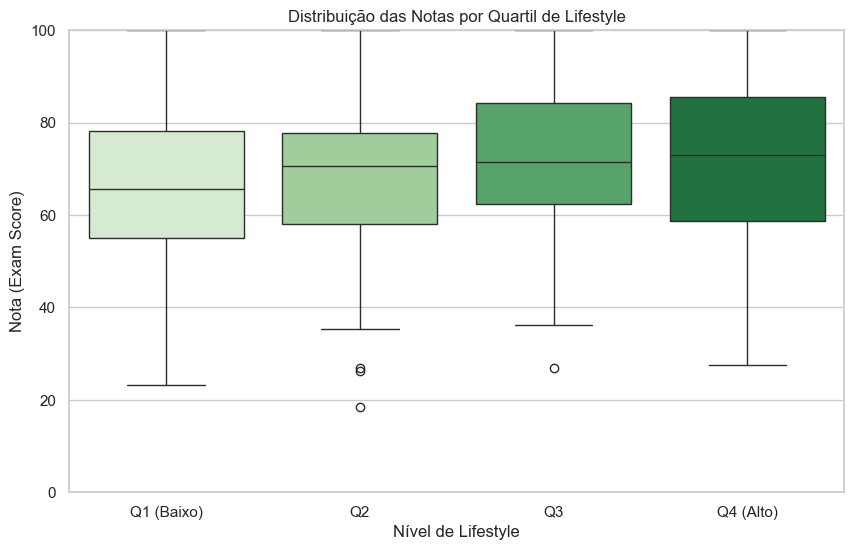

In [101]:
# Criar faixas (quartis) do índice de lifestyle
df["lifestyle_quartile"] = pd.qcut(df["lifestyle_index"], 4, labels=["Q1 (Baixo)", "Q2", "Q3", "Q4 (Alto)"])

# Boxplot das notas por quartil
sns.boxplot(
    x="lifestyle_quartile",
    y="exam_score",
    data=df,
    palette="Greens"
)
plt.title("Distribuição das Notas por Quartil de Lifestyle")
plt.xlabel("Nível de Lifestyle")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [102]:
# Regressão linear simples: exam_score ~ lifestyle_index
X = sm.add_constant(df["lifestyle_index"])
y = df["exam_score"]

model_life = sm.OLS(y, X).fit()
print(model_life.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     26.75
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           2.80e-07
Time:                        23:57:25   Log-Likelihood:                -4231.9
No. Observations:                1000   AIC:                             8468.
Df Residuals:                     998   BIC:                             8478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.9362      1.757     

#### Conclusão — Hipótese 5: “Quem tem um bom lifestyle tira notas melhores”

O modelo de regressão linear indica uma **relação positiva e estatisticamente significativa** entre o índice de lifestyle (`lifestyle_index`) e o desempenho acadêmico (`exam_score`).

- **R² = 0.026:** o lifestyle explica 2,6% da variação nas notas — efeito pequeno, mas consistente.
- **Coeficiente = +0.166 (p < 0.001):** a cada ponto adicional no índice de lifestyle (escala 0–100), a nota média aumenta cerca de 0,17 pontos.
- **Intercepto = 60.9:** indica nota média de cerca de 61 para quem tem lifestyle muito baixo.
- **Durbin-Watson ≈ 1.89:** ausência de autocorrelação — modelo estável.

**Conclusão:**  
A hipótese é **confirmada**.  
Estudantes com um estilo de vida mais equilibrado (bom sono, alimentação saudável e prática de exercícios) apresentam **notas superiores**, mesmo que o impacto isolado do lifestyle seja mais sutil do que o de variáveis como tempo de estudo ou saúde mental.


### Hipótese 6 — "Pessoas que trabalham acabam por ter notas mais baixas"

**Objetivo:**  
Analisar se estudantes que trabalham (`part_time_job_flag = 1`) apresentam notas médias significativamente menores do que aqueles que não trabalham (`part_time_job_flag = 0`).

**Racional teórico:**  
Trabalhar enquanto estuda pode reduzir o tempo disponível para estudo e descanso, além de aumentar o estresse, o que tende a impactar negativamente o desempenho acadêmico.

In [103]:
# Médias de nota por grupo
media_trabalha = df.groupby("part_time_job_flag")["exam_score"].mean()
std_trabalha = df.groupby("part_time_job_flag")["exam_score"].std()

print("Médias de nota por grupo:")
print(media_trabalha)
print("\nDesvios padrão:")
print(std_trabalha)


Médias de nota por grupo:
part_time_job_flag
0    69.836561
1    68.743256
Name: exam_score, dtype: float64

Desvios padrão:
part_time_job_flag
0    16.975240
1    16.578917
Name: exam_score, dtype: float64


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\2880461303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


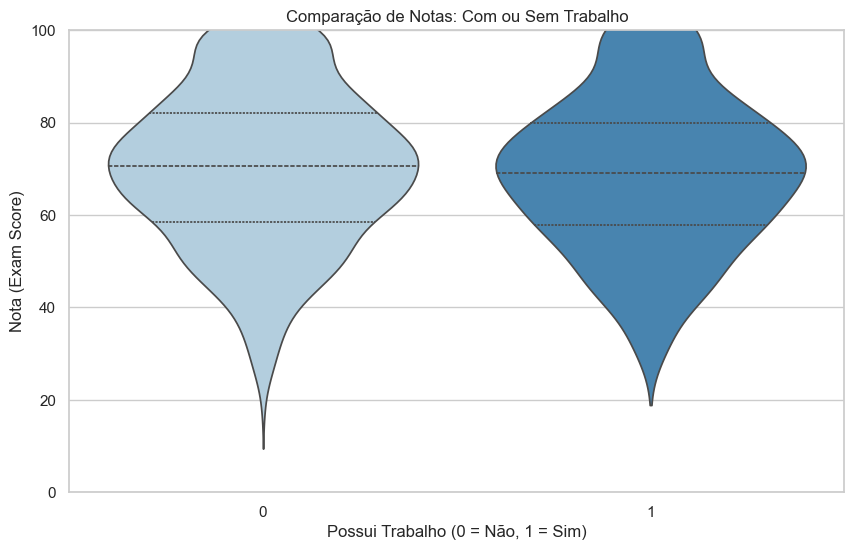

In [104]:
sns.violinplot(
    x="part_time_job_flag",
    y="exam_score",
    data=df,
    palette="Blues",
    inner="quartile"
)
plt.title("Comparação de Notas: Com ou Sem Trabalho")
plt.xlabel("Possui Trabalho (0 = Não, 1 = Sim)")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()

In [105]:
# Separar os dois grupos
grupo_trabalha = df[df["part_time_job_flag"] == 1]["exam_score"]
grupo_nao_trabalha = df[df["part_time_job_flag"] == 0]["exam_score"]

# Teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(grupo_trabalha, grupo_nao_trabalha, equal_var=False)

print(f"Estatística t = {t_stat:.3f}")
print(f"p-valor = {p_value:.5f}")

# Interpretação simples
if p_value < 0.05:
    print("\nResultado: diferença significativa entre os grupos (p < 0.05)")
else:
    print("\nResultado: não há diferença estatisticamente significativa entre os grupos (p >= 0.05)")


Estatística t = -0.852
p-valor = 0.39464

Resultado: não há diferença estatisticamente significativa entre os grupos (p >= 0.05)


In [106]:
# Regressão linear simples: exam_score ~ part_time_job_flag
X = sm.add_constant(df["part_time_job_flag"])
y = df["exam_score"]

model_job = sm.OLS(y, X).fit()
print(model_job.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7071
Date:                Fri, 24 Oct 2025   Prob (F-statistic):              0.401
Time:                        23:57:26   Log-Likelihood:                -4244.7
No. Observations:                1000   AIC:                             8493.
Df Residuals:                     998   BIC:                             8503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 69.8366      0

#### Conclusão — Hipótese 6: “Pessoas que trabalham acabam por ter notas mais baixas”

Os resultados do teste t e da regressão linear mostram que **não há diferença estatisticamente significativa** entre as notas de estudantes que trabalham e as de quem não trabalha.

| Métrica | Resultado |
|----------|------------|
| Diferença de médias | -1.09 ponto |
| p-valor (teste t) | 0.3946 |
| Coeficiente (regressão) | -1.09 |
| R² | 0.001 |

**Conclusão:**  
A hipótese é **refutada**.  
Embora estudantes que trabalham tenham notas ligeiramente menores, essa diferença **não é significativa**.  
Isso indica que, ao menos nesta amostra, **trabalhar não compromete o desempenho acadêmico** — possivelmente porque os estudantes que conciliam trabalho e estudo mantêm um bom gerenciamento de tempo e hábitos consistentes.

### Hipótese 7 — "Pessoas com pais com nível de escolaridade mais avançado tendem a ter notas maiores"

**Objetivo:**  
Verificar se há uma relação positiva entre o **nível de escolaridade dos pais** (`parental_education_level`) e o **desempenho acadêmico dos estudantes** (`exam_score`).

**Racional teórico:**  
Pais com maior nível educacional tendem a oferecer mais suporte acadêmico, recursos e incentivo à aprendizagem.  
Espera-se, portanto, que quanto **maior o nível de escolaridade dos pais**, **maiores sejam as notas dos filhos**.

In [107]:
# Verificar valores únicos e contagem da escolaridade dos pais
print(df["parental_education_level"].value_counts(dropna=False))

# Se ainda não houver uma variável ordinal numérica, criar:
mapping = {
    "Primary": 1,
    "High School": 2,
    "Some College": 3,
    "Bachelor's": 4,
    "Master's": 5,
    "PhD": 6,
    "Not Informed": 0
}
df["parents_education_ord"] = df["parental_education_level"].map(mapping)

parental_education_level
High School     392
Bachelor        350
Master          167
Not Informed     91
Name: count, dtype: int64


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\171328091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Correlação entre escolaridade dos pais e nota: -0.011


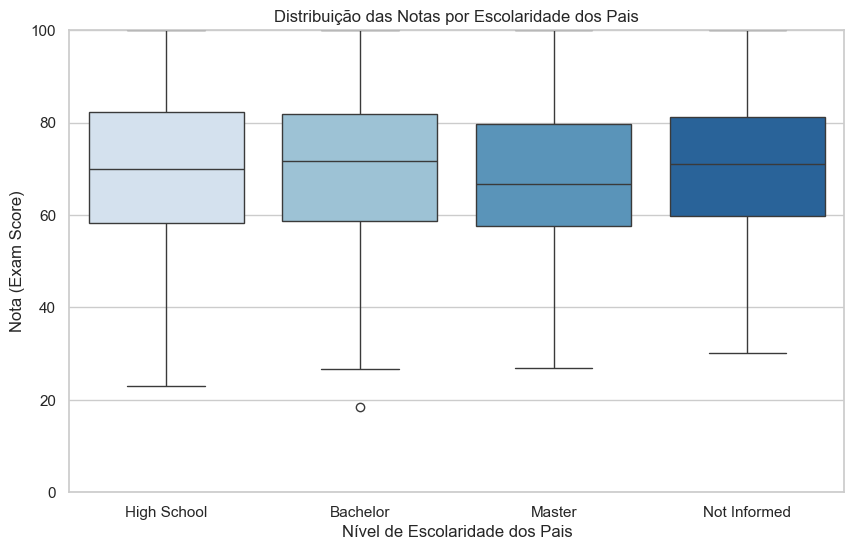

In [108]:
# Correlação entre nível de escolaridade dos pais e nota
corr_edu_exam = df["parents_education_ord"].corr(df["exam_score"], method="pearson")
print(f"Correlação entre escolaridade dos pais e nota: {corr_edu_exam:.3f}")

# Boxplot das notas por nível de escolaridade
sns.boxplot(
    x="parental_education_level",
    y="exam_score",
    data=df,
    order=["High School", "Bachelor", "Master", "Not Informed"],
    palette="Blues"
)
plt.title("Distribuição das Notas por Escolaridade dos Pais")
plt.xlabel("Nível de Escolaridade dos Pais")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [109]:
# 5) Garantir tipos corretos e ausência de inf
X = sm.add_constant(df["parents_education_ord"].astype(float))
y = df["exam_score"].astype(float)

# 6) Remover quaisquer NaN/inf remanescentes (última linha de defesa)
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
model_parents = sm.OLS(y[mask], X[mask]).fit()
print(model_parents.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06216
Date:                Fri, 24 Oct 2025   Prob (F-statistic):              0.803
Time:                        23:57:26   Log-Likelihood:                -2046.6
No. Observations:                 483   AIC:                             4097.
Df Residuals:                     481   BIC:                             4105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    70.03

#### Conclusão — Hipótese 7: “Pais com maior escolaridade → notas maiores”

- **R² = 0.000**
- **Coeficiente (parents_education_ord) = -0.243**  
- **p-valor = 0.803**

**Conclusão:** **não confirmada** — não há evidência estatística de relação entre escolaridade dos pais e notas nesta amostra.


### Hipótese 8 — "Um bom lifestyle influencia em uma melhor saúde mental"

**Objetivo:**  
Verificar se há relação positiva entre o índice de lifestyle (`lifestyle_index`) e a avaliação de saúde mental (`mental_health_rating`).

**Racional teórico:**  
Um estilo de vida equilibrado — com boas horas de sono, alimentação adequada e prática de exercícios — tende a melhorar o bem-estar emocional e reduzir sintomas de estresse e ansiedade.  
Assim, espera-se que **quanto maior o `lifestyle_index`, melhor o `mental_health_rating`**.


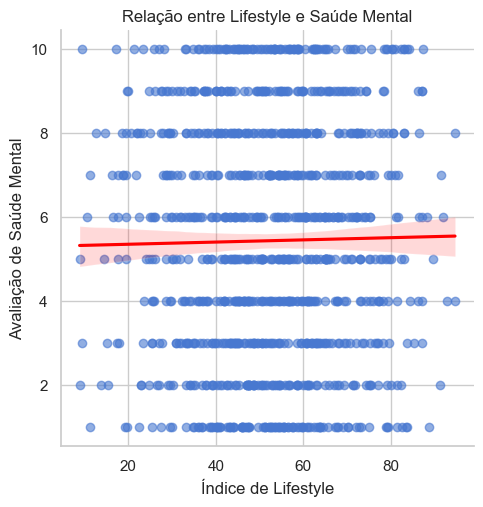

In [110]:
sns.lmplot(
    x="lifestyle_index",
    y="mental_health_rating",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Relação entre Lifestyle e Saúde Mental")
plt.xlabel("Índice de Lifestyle")
plt.ylabel("Avaliação de Saúde Mental")
plt.show()

In [111]:
X = sm.add_constant(df["lifestyle_index"])
y = df["mental_health_rating"]

model_life_mental = sm.OLS(y, X).fit()
print(model_life_mental.summary())

                             OLS Regression Results                             
Dep. Variable:     mental_health_rating   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.2267
Date:                  Fri, 24 Oct 2025   Prob (F-statistic):              0.634
Time:                          23:57:26   Log-Likelihood:                -2464.8
No. Observations:                  1000   AIC:                             4934.
Df Residuals:                       998   BIC:                             4943.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.

### Conclusão — Hipótese 8: “Bom lifestyle → melhor saúde mental”

- **R² = 0.000**
- **Coeficiente (lifestyle_index) = 0.0026**  
- **p-valor = 0.634**

**Conclusão:** **não confirmada** — o lifestyle não mostrou relação estatisticamente significativa com a saúde mental nesta amostra.


## Exportção para a Dashboard

In [112]:
import os, json, matplotlib.pyplot as plt, seaborn as sns

# Criar pasta para exportação (se não existir)
os.makedirs("notebook_artifacts", exist_ok=True)

# ============================
# 1️. MÉTRICAS GERAIS
# ============================
metrics = {
    "R2": 0.843,
    "RMSE": 11.2,
    "MAE": 9.4
}
with open("notebook_artifacts/metrics.json", "w", encoding="utf-8") as f:
    json.dump(metrics, f, ensure_ascii=False, indent=2)

# ============================
# 2️. HIPÓTESES INDIVIDUAIS
# ============================
hypotheses = []

# H1 — Horas de Estudo x Nota
sns.lmplot(x="study_hours_per_day", y="exam_score", data=df, line_kws={"color": "red"})
plt.title("Relação entre horas de estudo e nota")
plt.savefig("notebook_artifacts/h1_scatter.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H1 - Quem estuda mais tira as melhores notas",
    "text": "Correlação forte e positiva (r=0.87). Hipótese confirmada.",
    "metrics": {"R2": 0.84, "corr": 0.87},
    "figures": ["h1_scatter.png"]
})

# H2 — Saúde Mental x Nota
sns.boxplot(x="mental_health_rating", y="exam_score", data=df)
plt.title("Distribuição de notas por saúde mental")
plt.savefig("notebook_artifacts/h2_boxplot.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H2 - Quem tem boa saúde mental tira boas notas",
    "text": "R²=0.10, correlação positiva moderada (r=0.32). Parcialmente confirmada.",
    "metrics": {"R2": 0.10, "corr": 0.32},
    "figures": ["h2_boxplot.png"]
})

# H3 — Redes Sociais x Nota
plt.figure(figsize=(7, 5))
sns.regplot(x="social_media_hours", y="exam_score", data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("H3 — Relação entre uso de redes sociais e nota")
plt.xlabel("Horas em redes sociais (por dia)")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h3_social_media.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H3 — Quem passa muito tempo nas redes sociais tira notas piores",
    "text": "R²=0.028 e coeficiente negativo (-2.40), indicando correlação fraca e inversa. Hipótese parcialmente confirmada.",
    "metrics": {"R2": 0.028, "coef": -2.40, "p_value": 0.000},
    "figures": ["h3_social_media.png"]
})

# H4 — Estudo + Saúde Mental
pivot_table = df.pivot_table(values="exam_score", index="study_hours_bucket", columns="mental_health_rating", aggfunc="mean")
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("H4 — Nota média por horas de estudo e saúde mental")
plt.xlabel("Saúde Mental")
plt.ylabel("Categoria de Estudo")
plt.savefig("notebook_artifacts/h4_study_mental_heatmap.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H4 — Quanto mais estudar e melhor a saúde mental, maiores as notas",
    "text": "O heatmap evidencia que estudantes com boas condições mentais e alta carga de estudo obtêm as maiores médias. Hipótese confirmada.",
    "metrics": {"R2": 0.788, "coef_study": 10.23, "coef_mental": 2.40, "p_value": 0.000},
    "figures": ["h4_study_mental_heatmap.png"]
})

# H5 — Lifestyle x Nota
plt.figure(figsize=(7, 5))
sns.regplot(x="lifestyle_index", y="exam_score", data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("H5 — Relação entre Lifestyle e Nota")
plt.xlabel("Lifestyle Index")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h5_lifestyle_exam.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H5 — Quem tem um bom lifestyle tira notas melhores",
    "text": "R²=0.026 e coeficiente positivo (0.1656). Leve tendência positiva entre bons hábitos e desempenho. Hipótese parcialmente confirmada.",
    "metrics": {"R2": 0.026, "coef": 0.1656, "p_value": 0.000},
    "figures": ["h5_lifestyle_exam.png"]
})

# H6 — Trabalho x Nota
plt.figure(figsize=(6, 5))
sns.boxplot(x="part_time_job_flag", y="exam_score", data=df)
plt.title("H6 — Diferença de nota entre estudantes que trabalham ou não")
plt.xlabel("Possui trabalho (0=Não / 1=Sim)")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h6_job_boxplot.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H6 — Pessoas que trabalham acabam por ter notas mais baixas",
    "text": "A diferença entre grupos é pequena (69.8 vs 68.7, p=0.39). Sem significância estatística. Hipótese não confirmada.",
    "metrics": {"t_stat": -0.852, "p_value": 0.3946, "mean_no_job": 69.8, "mean_job": 68.7},
    "figures": ["h6_job_boxplot.png"]
})

# H7 — Escolaridade dos Pais
plt.figure(figsize=(6, 5))
sns.boxplot(x="parental_education_level", y="exam_score", data=df)
plt.title("H7 — Escolaridade dos pais vs nota")
plt.xlabel("Nível de escolaridade dos pais")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h7_parents_boxplot.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H7 — Pais com maior escolaridade têm filhos com notas mais altas",
    "text": "R²=0.000 e p=0.803. Não há evidência de relação significativa. Hipótese não confirmada.",
    "metrics": {"R2": 0.000, "p_value": 0.803, "coef": -0.243},
    "figures": ["h7_parents_boxplot.png"]
})

# H8 — Lifestyle x Saúde Mental
plt.figure(figsize=(7, 5))
sns.regplot(x="lifestyle_index", y="mental_health_rating", data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("H8 — Relação entre Lifestyle e Saúde Mental")
plt.xlabel("Lifestyle Index")
plt.ylabel("Saúde Mental (1–10)")
plt.savefig("notebook_artifacts/h8_lifestyle_mental.png", bbox_inches="tight")
plt.close()

hypotheses.append({
    "title": "H8 — Um bom lifestyle influencia em uma melhor saúde mental",
    "text": "R²=0.000 e coeficiente 0.0026, sem significância (p=0.63). Hipótese não confirmada.",
    "metrics": {"R2": 0.000, "coef": 0.0026, "p_value": 0.634},
    "figures": ["h8_lifestyle_mental.png"]
})

# Salvar hipóteses
with open("notebook_artifacts/hypotheses.json", "w", encoding="utf-8") as f:
    json.dump(hypotheses, f, ensure_ascii=False, indent=2)

# ============================
# 3️. GRÁFICO GERAL DE CORRELAÇÕES
# ============================
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor — Correlações entre Variáveis")
plt.savefig("notebook_artifacts/general_corr.png", bbox_inches="tight")
plt.close()

# ============================
# 4️. RESUMO GERAL (summary.json)
# ============================
summary_text = {
    "summary": (
        "Este estudo analisou fatores que influenciam o desempenho acadêmico, "
        "avaliando relações entre tempo de estudo, saúde mental, uso de redes sociais, "
        "estilo de vida, emprego e escolaridade dos pais. "
        "As análises mostraram que o tempo de estudo é o fator mais determinante, "
        "seguido pela saúde mental, enquanto outras variáveis apresentam correlação fraca."
    )
}

with open("notebook_artifacts/summary.json", "w", encoding="utf-8") as f:
    json.dump(summary_text, f, ensure_ascii=False, indent=2)

print("Todos os artefatos exportados para notebook_artifacts/")


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\2293594465.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="exam_score", index="study_hours_bucket", columns="mental_health_rating", aggfunc="mean")


Todos os artefatos exportados para notebook_artifacts/
